# Time evolution : SIS model

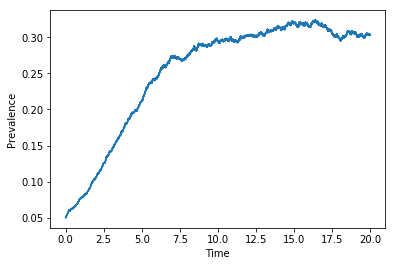

In [2]:
from spreading_CR import SpreadingProcess
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#create a random graph using networkx
seed = 42
N = 10000
p = 10**(-3)
G = nx.fast_gnp_random_graph(N,p, seed = seed)

#propagation parameters
transmission_rate = 0.15         
recovery_rate = 1              #rate at which infected nodes become recovered
waning_immunity_rate = np.inf  #rate at which recovered nodes become susceptible
infected_fraction = 0.05       #Initial infected fraction - at random

#initialize the propagation process
sp = SpreadingProcess(list(G.edges()), transmission_rate, recovery_rate, 
    waning_immunity_rate)
sp.initialize(infected_fraction, seed)

#simulate the process
t = 20
sp.evolve(t)

#get data vectors
Inode_number_vector = sp.get_Inode_number_vector()
time_vector = sp.get_time_vector()

#format 
prevalence_vector = [i/N for i in Inode_number_vector]

#draw the temporal sequence
plt.plot(time_vector, prevalence_vector)
plt.xlabel(r'Time')
plt.ylabel(r'Prevalence')
plt.show()

# Phase transition : SIR model

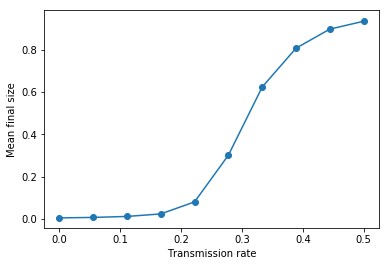

In [3]:
from spreading_CR import SpreadingProcess
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#create a random graph using networkx
seed = 42
N = 1000
k = 10
p = 0.05
G = nx.watts_strogatz_graph(N, k, p, seed=seed)

#propagation parameters
transmission_rate_list = np.linspace(0.0,0.5,10)         
recovery_rate = 1           #rate at which infected nodes become recovered
waning_immunity_rate = 0    #rate at which recovered nodes become susceptible
Inode_list = np.arange(0,5) #Initially infected nodes

#prepare the sampling of the final size
sample_size = 1000
mean_final_size_list = []
std_final_size_list = []

for transmission_rate in transmission_rate_list:
    #initialize the propagation process
    sp = SpreadingProcess(list(G.edges()), transmission_rate, 
                            recovery_rate, waning_immunity_rate)
    
    #get a sample of final size
    final_size_list = []
    for i in range(sample_size):
        #simulate until an absorbing state is reached
        sp.initialize(Inode_list, i)
        sp.evolve(np.inf)
        
        #get data and reset
        final_size_list.append(sp.get_Rnode_number_vector()[-1]/N)
        sp.reset()
    
    #get the statistics
    mean_final_size_list.append(np.mean(final_size_list))
    std_final_size_list.append(np.std(final_size_list))

#get the approximate std on the mean
std_mean_final_size_list = [std/np.sqrt(sample_size) 
                            for std in std_final_size_list]

#draw phase transition
plt.errorbar(transmission_rate_list, mean_final_size_list, 
             yerr = std_mean_final_size_list, fmt = 'o-')
plt.xlabel(r'Transmission rate')
plt.ylabel(r'Mean final size')
plt.show()